In [796]:
import numpy as np
import pandas as pd
from sklearn import datasets
import seaborn as sns
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [797]:
df = pd.read_csv(r"/home/surbhi/Documents/mp2/dataset.csv")
df.head(3)


,Age,Race,Marital Status,T Stage,N Stage,6th Stage,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,43,"Other (American Indian/AK Native, Asian/Pacifi...",Married (including common law),T2,N3,IIIC,Moderately differentiated; Grade II,Regional,40,Positive,Positive,19,11,1,Alive
1,47,"Other (American Indian/AK Native, Asian/Pacifi...",Married (including common law),T2,N2,IIIA,Moderately differentiated; Grade II,Regional,45,Positive,Positive,25,9,2,Alive
2,67,White,Married (including common law),T2,N1,IIB,Poorly differentiated; Grade III,Regional,25,Positive,Positive,4,1,2,Dead


In [798]:
df.shape

(4024, 15)

In [799]:
print(df.isnull().any())

Age                       False
Race                      False
Marital Status            False
T Stage                   False
N Stage                   False
6th Stage                 False
Grade                     False
A Stage                   False
Tumor Size                False
Estrogen Status           False
Progesterone Status       False
Regional Node Examined    False
Reginol Node Positive     False
Survival Months           False
Status                    False
dtype: bool


In [800]:
print(df.dtypes)

Age                        int64
Race                      object
Marital Status            object
T Stage                   object
N Stage                   object
6th Stage                 object
Grade                     object
A Stage                   object
Tumor Size                 int64
Estrogen Status           object
Progesterone Status       object
Regional Node Examined     int64
Reginol Node Positive      int64
Survival Months            int64
Status                    object
dtype: object


In [801]:
#labeling the data and converting to integers
from sklearn.preprocessing import LabelEncoder
labelencoder_Y = LabelEncoder()
df.iloc[:,4] = labelencoder_Y.fit_transform(df.iloc[:,4].values)
df.iloc[:,5] = labelencoder_Y.fit_transform(df.iloc[:,5].values)
df.iloc[:,2] = labelencoder_Y.fit_transform(df.iloc[:,2].values)
df.iloc[:,3] = labelencoder_Y.fit_transform(df.iloc[:,3].values)
df.iloc[:,1] = labelencoder_Y.fit_transform(df.iloc[:,1].values)
df.iloc[:,6] = labelencoder_Y.fit_transform(df.iloc[:,6].values)
df.iloc[:,7] = labelencoder_Y.fit_transform(df.iloc[:,7].values)
df.iloc[:,9] = labelencoder_Y.fit_transform(df.iloc[:,9].values)
df.iloc[:,10] = labelencoder_Y.fit_transform(df.iloc[:,10].values)
df.iloc[:,14] = labelencoder_Y.fit_transform(df.iloc[:,14].values)
#df.iloc[:,15] = labelencoder_Y.fit_transform(df.iloc[:,15].values)

In [802]:
print(df.describe())

               Age        Race   Marital Status     T Stage       N Stage  \
count  4024.000000  4024.000000     4024.000000  4024.000000  4024.000000   
mean     53.972167     1.775845        1.371272     0.784791     0.438370   
std       8.963134     0.564465        1.063637     0.765531     0.693479   
min      30.000000     0.000000        0.000000     0.000000     0.000000   
25%      47.000000     2.000000        1.000000     0.000000     0.000000   
50%      54.000000     2.000000        1.000000     1.000000     0.000000   
75%      61.000000     2.000000        1.000000     1.000000     1.000000   
max      69.000000     2.000000        4.000000     3.000000     2.000000   

         6th Stage        Grade      A Stage   Tumor Size  Estrogen Status  \
count  4024.000000  4024.000000  4024.000000  4024.000000      4024.000000   
mean      1.321819     0.690358     0.977137    30.473658         0.933151   
std       1.266624     1.016418     0.149485    21.119696         0.2497

In [803]:
correlation = df.corr(method='pearson')
columns = correlation.nlargest(15, 'Survival Months').index
columns

Index(['Survival Months', 'Estrogen Status', 'Progesterone Status', 'A Stage',
       'Race ', 'Grade', 'Age', 'Regional Node Examined', 'Marital Status',
       'T Stage ', 'Tumor Size', 'Reginol Node Positive', 'N Stage',
       '6th Stage', 'Status'],
      dtype='object')

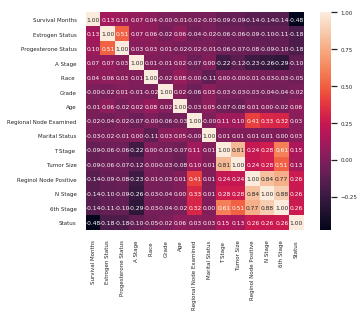

In [804]:
correlation_map = np.corrcoef(df[columns].values.T)
sns.set(font_scale=.50)
heatmap = sns.heatmap(correlation_map, cbar=True, annot=True, square=True, fmt='.2f',
                      yticklabels=columns.values, xticklabels=columns.values)

plt.show()

In [805]:
df['Survival Months'] = np.log(df['Survival Months'])
df['Age'] = np.log(df['Age'])

In [806]:
X = df[columns]
Y = X['Survival Months'].values
X = X.drop('Survival Months', axis = 1).values

In [807]:
X_train, X_test, Y_train, Y_test = train_test_split (X, Y, test_size = 0.1)

In [808]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor


In [809]:
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR',LinearRegression())])))
pipelines.append(('ScaledLASSO', Pipeline([('Scaler', StandardScaler()),('LASSO', Lasso())])))
pipelines.append(('ScaledEN', Pipeline([('Scaler', StandardScaler()),('EN', ElasticNet())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsRegressor())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeRegressor())])))
pipelines.append(('ScaledGBM', Pipeline([('Scaler', StandardScaler()),('GBM', GradientBoostingRegressor())])))

results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=50)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='neg_mean_squared_error')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

ScaledLR: -0.181778 (0.079872)
ScaledLASSO: -0.236311 (0.093158)
ScaledEN: -0.236311 (0.093158)
ScaledKNN: -0.213440 (0.079947)
ScaledCART: -0.375203 (0.126709)
ScaledGBM: -0.183120 (0.079611)


In [810]:
from sklearn.metrics import mean_squared_error
from math import sqrt

scaler = StandardScaler().fit(X_train)
rescaled_X_train = scaler.transform(X_train)
model = LinearRegression(fit_intercept=True, normalize=False, copy_X=True, n_jobs=None)
model.fit(rescaled_X_train, Y_train)

# transform the validation dataset
rescaled_X_test = scaler.transform(X_test)
predictions = model.predict(rescaled_X_test)
error=sqrt(mean_squared_error(Y_test, predictions))
print(error)

0.40615176841224127


In [811]:
compare = pd.DataFrame({'Prediction': predictions, 'Test Data' : Y_test})
compare.head(30)


,Prediction,Test Data
0,4.209505,4.584967
1,4.292389,4.510860
2,4.305540,4.127134
3,4.285756,4.276666
4,3.662794,3.688879
5,4.288648,4.343805
6,3.645727,2.564949
7,4.201158,4.543295
8,4.261705,4.394449
9,4.298809,3.871201


In [812]:
#Print Prediction of model
print(predictions)
#Print a space
print()
#Print the actual values
print(Y_test)
print()

[ 4.20950475  4.29238864  4.30553995  4.28575591  3.66279415  4.28864756
  3.64572654  4.20115779  4.26170459  4.29880855  4.19601614  4.29497419
  3.63384643  4.30994354  3.677169    4.27208023  4.26968094  4.3086866
  4.3160178   4.26468938  4.29651182  4.30042797  4.27466774  4.27717251
  4.30514735  3.60514794  4.32119088  4.27739949  4.32340763  3.68638435
  4.28569201  4.2858543   4.29816656  3.68054957  4.29799628  4.28739871
  4.18945517  3.64038948  3.67975084  4.31077325  4.286432    4.29548108
  4.31756229  4.27198361  4.27905793  4.30810884  4.30600803  4.29087708
  4.24889757  4.26431553  4.29220335  3.63875764  4.26618702  4.30757392
  3.51358677  4.30715532  4.28468026  4.28126554  4.31559194  4.28897979
  3.49685688  4.30218991  4.31727893  4.30136172  4.29048382  4.30167729
  4.28883566  3.59099085  4.28444841  4.28014167  4.29844692  4.27353603
  4.33032113  4.3037399   4.27112878  3.66934812  3.68617206  4.18959934
  3.6354563   4.2295823   4.26537099  4.26069844  4.

In [813]:
actual_y_test = np.exp(Y_test)
actual_predicted = np.exp(predictions)
diff = (actual_y_test - actual_predicted)

compare_actual = pd.DataFrame({'Test Data': actual_y_test, 'Predicted ' : actual_predicted, 'Difference' : diff})
compare_actual = compare_actual.astype(int)
compare_actual.head(30)

,Test Data,Predicted,Difference
0,98,67,30
1,90,73,17
2,62,74,-12
3,72,72,0
4,40,38,1
5,77,72,4
6,13,38,-25
7,94,66,27
8,81,70,10
9,48,73,-25


In [814]:
error=sqrt(mean_squared_error(actual_y_test, actual_predicted))
print(error)

20.098563007288533
